# The $\theta - \beta - M$ relation

Dr. Daniel Duke<br>
Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)<br>
Department of Mechanical & Aerospace Engineering<br>
Monash University, Australia

The function takes the following form:

$$
    \begin{align}
    \tan \theta = 2 \cot \beta \frac{ M_1^2 \sin^2 \beta - 1} {M_1^2 \left( \gamma + \cos 2 \beta \right) + 2 }
    \end{align}
$$

where:
$$
\begin{align}
\theta &=& \text{deflection angle}\\
\beta &=& \text{wave angle}\\
M_1 &=& \text{upstream Mach number}\\
\gamma &=& \text{ratio of specific heats}
\end{align}
$$
Let's plot this function:

In [1]:
# Functions to graph. beta is in degrees.
def tbm(M1,beta,gamma=1.4):
    beta_rad = beta * np.pi / 180.
    numerator = (2/np.tan(beta_rad)) * ((M1 * np.sin(beta_rad))**2 - 1)
    denominator = ( M1**2 * (gamma + np.cos(2*beta_rad)) + 2)
    denominator[denominator==0]=np.nan
    theta = np.arctan2(numerator, denominator) * 180. / np.pi # degrees out
    theta[theta<0] = np.nan # no negative angles allowed
    return theta

def sonic_limit(M1,theta,beta,gamma=1.4): # Find theta and beta for sonic limit from solved values
    
    # First find limit between strong and weak shock solutions
    i = np.where(np.nanmax(theta)==theta)[0][0]
    
    # Now find sonic limit somewhere near this value
    b = np.arange(beta[i]-20,beta[i]+1,0.5)
    b_rad = b*np.pi/180.
    th = tbm(M1,b,gamma)
    Mn1 = M1*np.sin(b_rad)
    Mn2sq = (1 + ((gamma-1)/2.)*(Mn1**2))/(gamma*Mn1**2 - ((gamma-1)/2.))
    error = (Mn2sq**.5 - np.sin(b_rad - th*np.pi/180.))**2
    j = np.where(error == np.nanmin(error))
    
    return theta[i], beta[i],  th[j], b[j]

In [2]:
# Import python libraries
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

In [3]:
# Define constants
gamma = 1.4 # air
M1_default = 2.0 # starting value

# Define range of wave angles to graph
beta = np.arange(0.25, 90, 0.25)  # small step size makes redraw slow

# Define a user controllable slider for M1
#M1_slider=widgets.FloatSlider(min=1.01,max=20.,step=0.01,value=M1_default)
M1_slider=widgets.FloatLogSlider(min=np.log10(1.01),max=np.log10(25),step=0.01,value=M1_default)

<IPython.core.display.Javascript object>


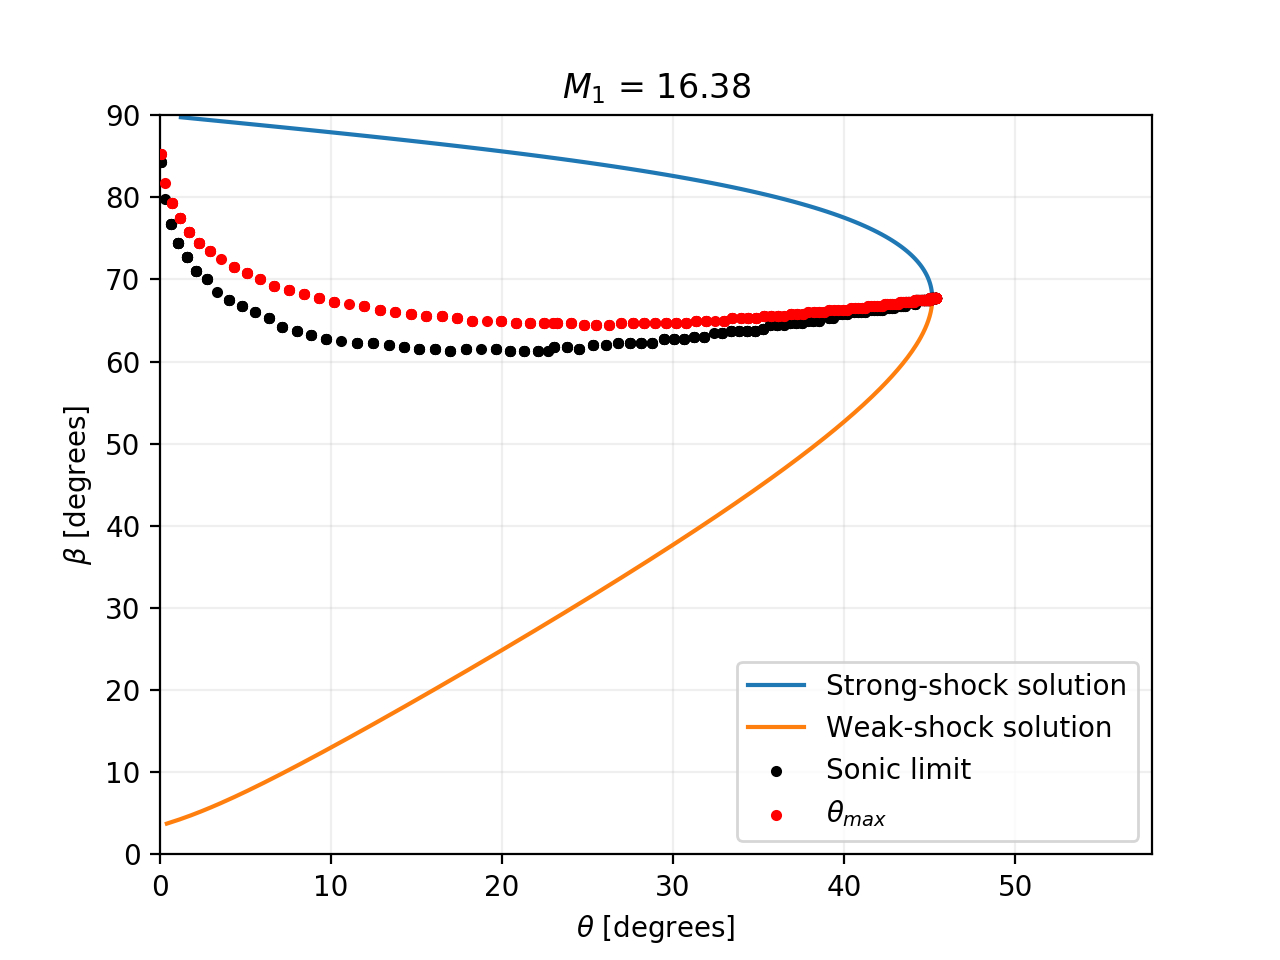

interactive(children=(FloatLogSlider(value=2.0, description='M1', max=1.3979400086720377, min=0.00432137378264…

In [4]:
# Plot beta vs theta ###

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("$M_1$ = %.2f" % M1_slider.value)
plt.grid(alpha=.2)
plt.xlabel("$\\theta$ [degrees]")
plt.ylabel("$\\beta$ [degrees]")

plt.xlim(0,58)
plt.ylim(0,90)

theta = tbm(M1_slider.value,beta,gamma)
t1,b1,t2,b2 = sonic_limit(M1_slider.value,theta,beta,gamma)

graph1, = ax.plot(theta[beta>=b1],beta[beta>=b1])
graph2, = ax.plot(theta[beta< b1],beta[beta< b1])
ax.scatter(t2,b2,c='k',marker='.',zorder=3)
ax.scatter(t1,b1,c='r',marker='.',zorder=4)



plt.legend(["Strong-shock solution","Weak-shock solution","Sonic limit","$\\theta_{max}$"],loc='lower right')

def update_graph(M1):
    
    theta=tbm(M1,beta,gamma)
    t1,b1,t2,b2 = sonic_limit(M1_slider.value,theta,beta,gamma)
    
    graph1.set_xdata(theta[beta>=b1])
    graph1.set_ydata(beta[beta>=b1])
    graph2.set_xdata(theta[beta< b1])
    graph2.set_ydata(beta[beta< b1])
    ax.scatter(t2,b2,c='k',marker='.',zorder=3)
    ax.scatter(t1,b1,c='r',marker='.',zorder=4)
    ax.set_title("$M_1$ = %.2f" % M1)
    fig.canvas.draw_idle()
    
    return
    

interact(update_graph, M1=M1_slider);